In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

In [2]:
#### DEFINING THE MODEL

model = Sequential()
model.add(Conv2D(64, (3,3), padding='same', strides=1, activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3,3), padding='same', strides=1 ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(128, (3,3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(256, (3,3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(29, activation='softmax'))

In [3]:
trainpath = 'E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/American Sign Language/asl_alphabet_train/asl_alphabet_train/'

In [4]:
import cv2 as cv
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
classes = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25, 'del':26, 'nothing':27, 'space':28}

def load_data():
    images = []
    labels = []

    for folders in os.listdir(trainpath):
        labels_act = folders
        for files in os.listdir(trainpath+folders+'/'):
            image = cv.imread(trainpath+folders+'/'+files)
            image = cv.resize(image, (64, 64))
            images.append(image)
            labels.append(classes[labels_act])
    labels = np.array(labels)
    images = np.array(images)
    return images, labels

In [6]:
images, labels = load_data()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.05)

In [8]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [9]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [10]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(np.unique(labels))

(82650, 64, 64, 3) (4350, 64, 64, 3) (82650, 29) (4350, 29)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
Hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.1, batch_size=64)

Train on 74385 samples, validate on 8265 samples
Epoch 1/5
74385/74385 [==============================] - 250s 3ms/sample - loss: 1.1051 - accuracy: 0.8295 - val_loss: 1.0703 - val_accuracy: 0.8600
Epoch 2/5
74385/74385 [==============================] - 402s 5ms/sample - loss: 0.5766 - accuracy: 0.9675 - val_loss: 1.9870 - val_accuracy: 0.7091
Epoch 3/5
74385/74385 [==============================] - 524s 7ms/sample - loss: 0.5541 - accuracy: 0.9748 - val_loss: 0.9225 - val_accuracy: 0.9013
Epoch 4/5
74385/74385 [==============================] - 557s 7ms/sample - loss: 0.5633 - accuracy: 0.9789 - val_loss: 0.4327 - val_accuracy: 0.9929
Epoch 5/5
74385/74385 [==============================] - 567s 8ms/sample - loss: 0.4196 - accuracy: 0.9850 - val_loss: 0.3730 - val_accuracy: 0.9929


In [13]:
model.evaluate(X_test, Y_test, batch_size=64)

4350/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3800578691493506, 0.99425286]

In [14]:
classes

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [15]:
import matplotlib.pyplot as plt

In [16]:
testpath = 'E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/American Sign Language/asl_alphabet_test/asl_alphabet_test/'

In [17]:
images_test = []
images_labels = []

for files in os.listdir(testpath):
    image = cv.imread(testpath+files)
    image = cv.resize(image, (64, 64))
    image = image.astype('float32')/255.0
    labels = files
    images_test.append(image)
    images_labels.append(labels)

In [18]:
predictions = [model.predict_classes(image.reshape(1, 64, 64, 3))[0] for image in images_test]

In [19]:
pred_req = []
for i in range(len(predictions)):
    for keys in classes:
        if predictions[i] == classes[keys]:
            pred_req.append(keys)
        
pred_req

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'nothing',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'space',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

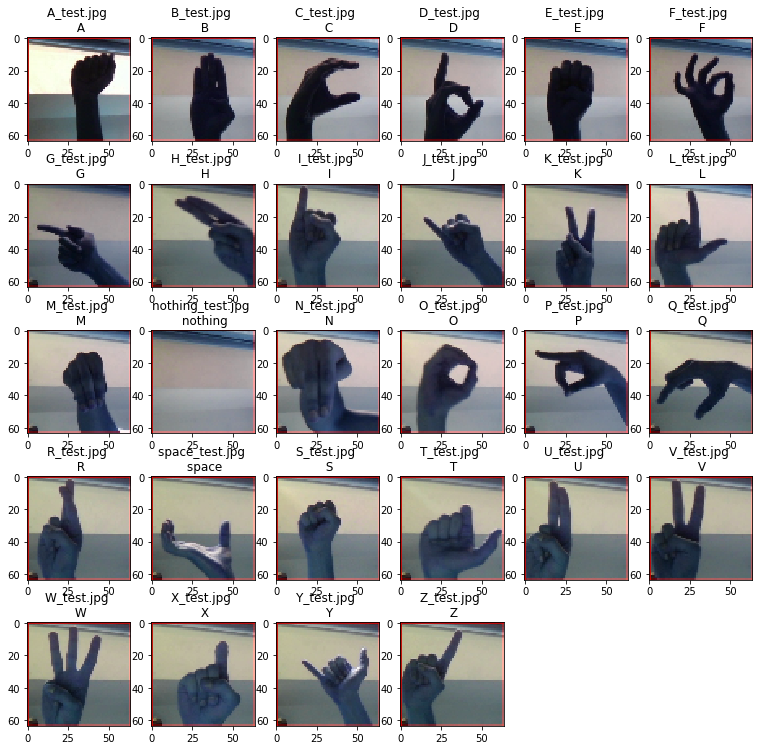

In [20]:
rows = 5
columns = 6
index_number = 0
fig = plt.figure(figsize=(13, 13))

for i in range(1, (rows*columns)-1):
    fig.add_subplot(rows, columns, i)
    image = images_test[index_number]
    plt.imshow(image)
    plt.title('{} \n {}'.format(images_labels[index_number], pred_req[index_number]))
    index_number += 1
plt.show()

In [21]:
model.save('E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/Saved Models/ASL/ASL-VGG16.h5')